# Binning

In [7]:
import pandas as pd
import numpy as np
from geopy.distance import great_circle
import math
import seaborn as sns
from scipy import spatial
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import datetime

In [8]:
from yellowbrick.datasets import load_concrete
from yellowbrick.target import BalancedBinningReference

In [9]:
# Expanding number of columns:
pd.set_option('display.max_columns', 40)

In [11]:
Fire_Brightness_Model = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/FireExports/FireBrightnessModel/FireIntensity_Model_June4_Clean.csv')

In [12]:
print(Fire_Brightness_Model.shape)
Fire_Brightness_Model.head()

(1328922, 20)


,latitude,longitude,doy,month,year,cluster_reference,season,covertype,fuelcode,prefire_fuel,fuel_moisture_class,temperature,humidity,precip_intensity,visibility,wind_speed,wind_gust,brightness,bright_t31,frp
0,34.5954,-78.6218,1,1,2003,2003_4279,3,3,1600,6220.097576,3,64.14,0.88,0.011,9.022000,6.42,12.51,306.5,289.2,11.0
1,33.4182,-110.8618,1,1,2003,2003_1522,3,3,1220,4534.187262,2,32.17,0.37,0.000,9.216293,6.88,18.50,307.6,285.1,10.8
2,29.7120,-95.1284,1,1,2003,2003_919,3,1,1,277.412850,2,65.97,0.50,0.000,9.997000,10.98,16.90,307.2,294.1,5.6
3,28.9161,-98.6293,1,1,2003,2003_777,3,1,1,251.296812,2,72.89,0.51,0.000,9.997000,25.06,28.59,313.3,297.4,12.0
4,32.7772,-95.0444,1,1,2003,2003_3100,3,1,1,173.172870,2,58.39,0.30,0.000,9.216293,7.99,10.99,301.3,289.9,4.2


---
## Graphing

In [45]:
# Brightness
e = Fire_Brightness_Model['brightness'].min()
ee = Fire_Brightness_Model['brightness'].max()
eee = Fire_Brightness_Model['brightness'].mean(skipna = True)
Q1e, mediane, Q3e = np.percentile(Fire_Brightness_Model['brightness'], [25,50,75])
print('Min', e)
print('Max', ee)
print('Mean', eee)
print(Q1e, mediane, Q3e)

Min 300.0
Max 506.5
Mean 323.8604039966302
309.8 317.9 330.2


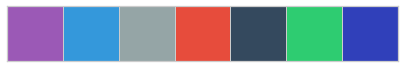

In [19]:
#
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", '#3040ba']
sns.palplot(sns.color_palette(flatui))

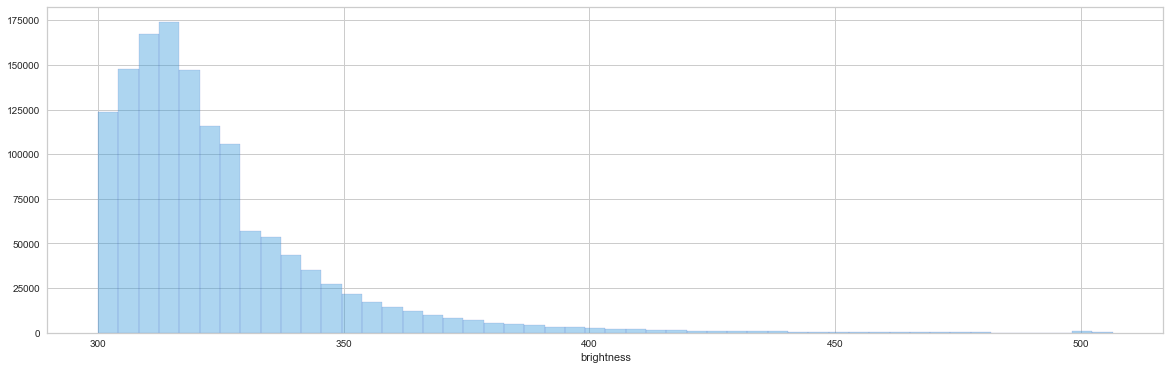

In [20]:
plt.figure(figsize=(20, 6))
sns.distplot(Fire_Brightness_Model["brightness"], hist=True, kde=False, rug=False, color = '#3498db', hist_kws={'edgecolor':'#3040ba'})
#sns.plt.show()

In [25]:
y = Fire_Brightness_Model['brightness']

In [26]:
y.shape

(1328922,)

In [24]:
from yellowbrick.datasets import load_concrete
from yellowbrick.target import balanced_binning_reference

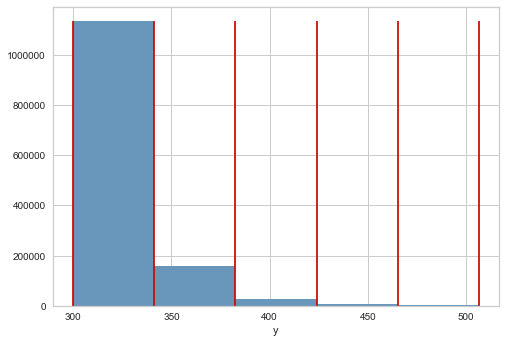

In [59]:
visualizer = BalancedBinningReference(bins = 5)
visualizer.fit(y)
visualizer.show()

bins = [300, 340, 380, 420, 460, 506.5]

In [53]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [54]:
Fire_Brightness_Model['brightness'].describe()

count   1328922.00000
mean        323.86040
std          22.26737
min         300.00000
25%         309.80000
50%         317.90000
75%         330.20000
max         506.50000
Name: brightness, dtype: float64

In [50]:
pd.qcut(Fire_Brightness_Model['brightness'], q=4)

0          (299.999, 309.8]
1          (299.999, 309.8]
2          (299.999, 309.8]
3            (309.8, 317.9]
4          (299.999, 309.8]
5          (299.999, 309.8]
6            (309.8, 317.9]
7          (299.999, 309.8]
8          (299.999, 309.8]
9          (299.999, 309.8]
10           (309.8, 317.9]
11         (299.999, 309.8]
12           (317.9, 330.2]
13         (299.999, 309.8]
14           (309.8, 317.9]
15           (309.8, 317.9]
16         (299.999, 309.8]
17         (299.999, 309.8]
18           (309.8, 317.9]
19           (317.9, 330.2]
20           (309.8, 317.9]
21           (309.8, 317.9]
22         (299.999, 309.8]
23         (299.999, 309.8]
24           (317.9, 330.2]
25           (317.9, 330.2]
26           (317.9, 330.2]
27         (299.999, 309.8]
28           (309.8, 317.9]
29           (330.2, 506.5]
                 ...       
1328892    (299.999, 309.8]
1328893    (299.999, 309.8]
1328894    (299.999, 309.8]
1328895    (299.999, 309.8]
1328896    (299.999,

In [ ]:
plt.figure(figsize=(20, 6))
sns.distplot(emdata_cleanv1['prefire_fuel'], hist = True, kde = True, bins=int(180/2), color = '#3498db', 
             kde_kws = {'shade': False, 'linewidth': 1, 'color': '#e74c3c'}, 
             hist_kws={'edgecolor':'#34495e'})
             #label = 'Prefuel Fire Mass')

plt.title('Histogram of PreFire Fuel Amounts across 2003 to 2015')
plt.xlabel('PreFire Fuel Mass')
plt.ylabel('Distributinon of PreFire Fuel Measurements')

In [ ]:
plt.figure(figsize=(20, 6))

covertypeplot = sns.catplot(x="year", y="ECO2", hue='covertype', data=emyeartest,
                height=6, kind="bar", palette=flatui)
covertypeplot.despine(left=True)
covertypeplot.set_ylabels("CO2 Emissions Intensity")